<a href="https://colab.research.google.com/github/Victoresteban-bit/METODOS-NUMERICS/blob/main/Polinomio_de_Lagrange_con_sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dado un conjunto de \( k+1 \) nodos \( \{x_0, x_1, \dots, x_k\} \), que todos deben ser distintos, \( x_j \neq x_m \) para índices \( j \neq m \), la **Base de referencia** para polinomios de grado \( \leq k \) para esos nodos es el conjunto de polinomios \( \{\ell_0(x), \ell_1(x), \dots, \ell_k(x)\} \), cada uno de grado \( k \), que toman valores \( \ell_j(x_m) = 0 \) si \( m \neq j \) y \( \ell_j(x_j) = 1 \). Usando el delta de Kronecker esto se puede escribir como \( \ell_j(x_m) = \delta_{jm} \). Cada base polinómica puede ser descrita explícitamente por el producto:

$$
\ell_j(x) = \frac{(x - x_0)}{(x_j - x_0)} \cdots \frac{(x - x_{j-1})}{(x_j - x_{j-1})} \frac{(x - x_{j+1})}{(x_j - x_{j+1})} \cdots \frac{(x - x_k)}{(x_j - x_k)}
$$

$$
= \prod_{\substack{0 \leq m \leq k \\ m \neq j}} \frac{x - x_m}{x_j - x_m}.
$$

Note que el numerador \( \prod_{m \neq j} (x - x_m) \) tiene \( k \) raíces en los nodos \( \{x_m\}_{m \neq j} \), mientras que el denominador \( \prod_{m \neq j} (x_j - x_m) \) escala el polinomio resultante para que \( \ell_j(x_j) = 1 \).

El polinomio interpolador de Lagrange para esos nodos a través de los valores correspondientes \( \{y_0, y_1, \dots, y_k\} \) es la combinación lineal:

$$
L(x) = \sum_{j=0}^{k} y_j \ell_j(x).
$$

Cada base polinómica tiene grado \( k \), así que la suma \( L(x) \) también tiene grado \( \leq k \) e interpola los datos porque:

$$
L(x_m) = \sum_{j=0}^{k} y_j \ell_j(x_m) = \sum_{j=0}^{k} y_j \delta_{mj} = y_m.
$$

El polinomio interpolador es único. Para demostrarlo, asumamos que existe otro polinomio \( M(x) \) de grado \( \leq k \) que interpola los datos. Entonces, la diferencia \( M(x) - L(x) \) es un polinomio de grado \( \leq k \) que se anula en \( k+1 \) nodos distintos \( \{x_0, x_1, \dots, x_k\} \). Pero el único polinomio de grado \( \leq k \) con más de \( k \) raíces es la función cero, por lo que:

$$
M(x) - L(x) = 0 \quad \Rightarrow \quad M(x) = L(x).
$$


Ingrese el número de puntos: 3
Ingrese el valor de x para el punto 1: 0
Ingrese el valor de y para el punto 1: 0
Ingrese el valor de x para el punto 2: 0.6
Ingrese el valor de y para el punto 2: 0.4700
Ingrese el valor de x para el punto 3: 0.9
Ingrese el valor de y para el punto 3: 0.6418
El polinomio de Lagrange es: x*(0.923777777777778 - 0.234074074074074*x)


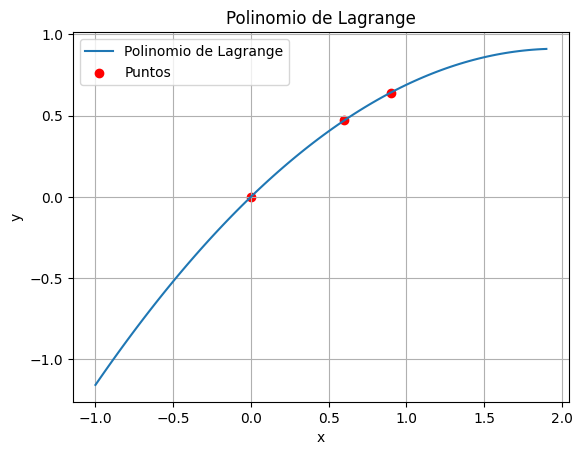

Ingrese el valor de x para obtener el valor aproximado: 0.45
El valor aproximado de y para x = 0.45 es: 0.3683000000000001


In [16]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir la variable simbólica
x = sp.Symbol('x')

# Solicitar al usuario los puntos
num_points = int(input("Ingrese el número de puntos: "))
x_values = []
y_values = []
for i in range(num_points):
    x_val = float(input(f"Ingrese el valor de x para el punto {i + 1}: "))
    y_val = float(input(f"Ingrese el valor de y para el punto {i + 1}: "))
    x_values.append(x_val)
    y_values.append(y_val)

# Calcular el polinomio de Lagrange
polynomial = 0
for i in range(num_points):
    term = y_values[i]
    for j in range(num_points):
        if i != j:
            term *= (x - x_values[j]) / (x_values[i] - x_values[j])
    polynomial += term

# Simplificar el polinomio
polynomial = sp.simplify(polynomial)

# Imprimir el polinomio de Lagrange
print(f"El polinomio de Lagrange es: {polynomial}")

# Graficar el polinomio
x_vals = np.linspace(min(x_values) - 1, max(x_values) + 1, 100)
y_vals = [polynomial.subs({x: val}).evalf() for val in x_vals]

plt.plot(x_vals, y_vals, label='Polinomio de Lagrange')
plt.scatter(x_values, y_values, color='red', label='Puntos')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polinomio de Lagrange')
plt.legend()
plt.grid(True)
plt.show()

# Definir el polinomio como una función
f = sp.lambdify(x, polynomial, 'numpy')

# Solicitar al usuario el valor de x para la aproximación
x_approx = float(input("Ingrese el valor de x para obtener el valor aproximado: "))

# Calcular el valor aproximado
y_approx = f(x_approx)

# Imprimir el valor aproximado
print(f"El valor aproximado de y para x = {x_approx} es: {y_approx}")